In [222]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *

from sklearn.datasets import make_blobs, make_moons

import seaborn as sns
sns.set()
sns.set_style('white')

def myplot(X, y, a, b, margin=True, line_alpha=.5, filename=None,callback=None):
    plt.scatter(X[:,0], X[:, 1], c=y, s=75, cmap='cool', alpha=.7)

    if line_alpha > 0.0:
        x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
        y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
        Y, X = np.meshgrid(y, x)

        P = np.zeros_like(X)
        for i, xi in enumerate(x):
            for j, yj in enumerate(y):
                P[i, j] = np.array([xi, yj]).dot(a) - b

        levels=[0]
        linestyles=['-']
        if margin:
            levels += [-1, 1]
            linestyles += ['--', '--']

        plt.contour(X, Y, P, colors='k',
                   levels=levels, alpha=line_alpha,
                   linestyles=linestyles)
    
    if callback:
        callback()
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')

In [3]:
N = 50
n = 2

X, y = make_blobs(50, centers = 2, random_state=3)
y = 2*y - 1

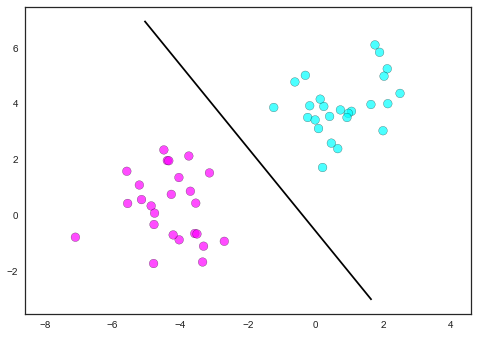

In [4]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a[0] - 20*a[1]))
obj = Minimize(norm(a))
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/first.pdf')

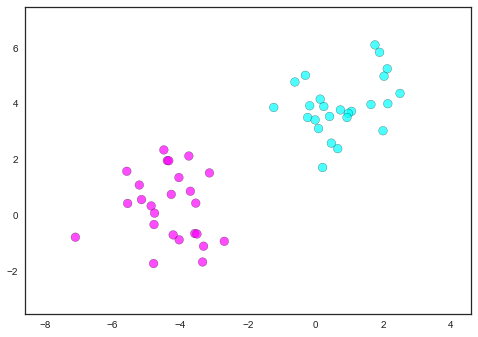

In [5]:
myplot(X, y, a, b, margin=False, line_alpha=0, filename='fig/lin_sep.pdf')

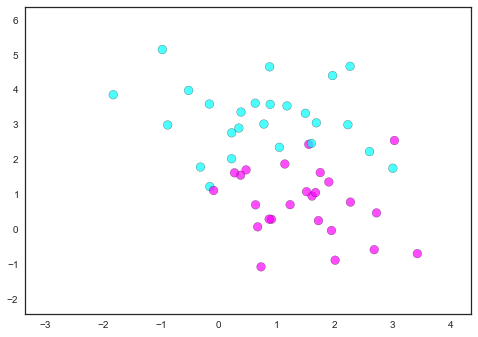

In [120]:
X, y = make_blobs(50, centers = 2, random_state=0, center_box=(-7.5,7.5))
y = 2*y - 1
myplot(X, y, a, b, margin=False, line_alpha=0, filename='fig/approx_lin_sep.pdf')

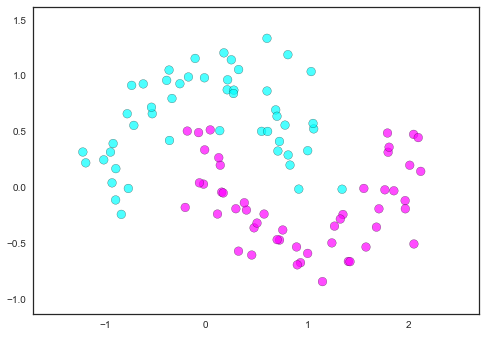

In [121]:
X, y = make_moons(100, noise = .2, random_state=0)
y = 2*y - 1
myplot(X, y, a, b, margin=False, line_alpha=0, filename='fig/non_lin_sep.pdf')

# regions

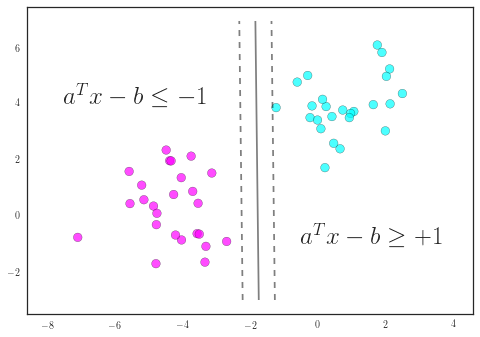

In [28]:
from matplotlib import rc
# latex for text makes math pretty, but rendering super slow
rc('text', usetex=True)

a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

def foo():
    plt.text(-7.5, 4, r'$a^Tx - b \leq -1$', fontsize=25)
    plt.text(-.5, -1, r'$a^Tx - b \geq +1$', fontsize=25)
    
myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/regions.pdf', callback=foo)

In [ ]:
rc('text', usetex=False)

# which separator?

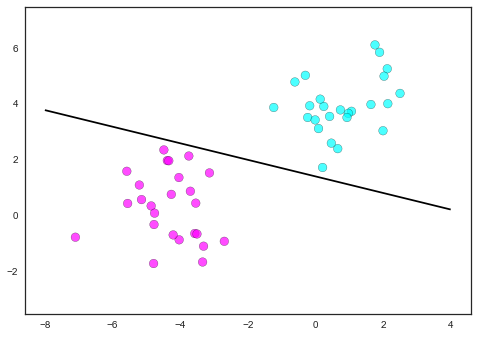

In [57]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
#obj = Minimize(norm(.1*a[0] - 10*a[1]))
c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which1.pdf')

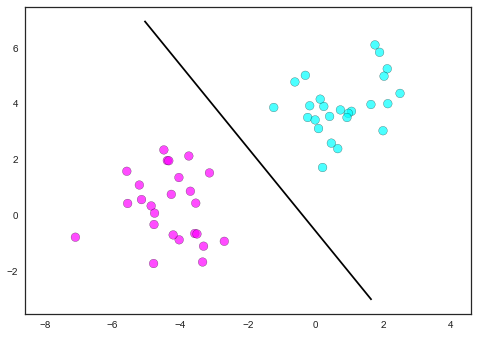

In [58]:
a = Variable(n)
b = Variable()

obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
#obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which2.pdf')

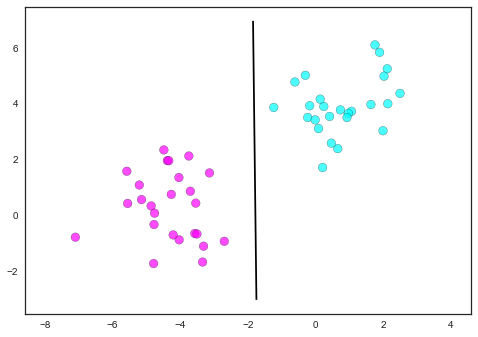

In [59]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which3.pdf')

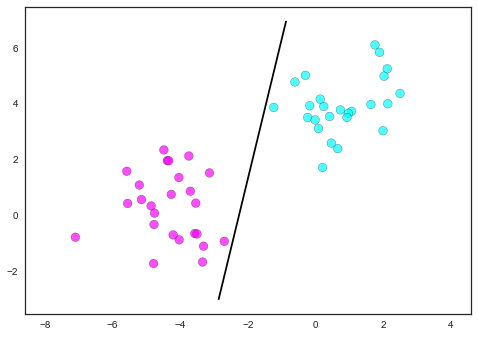

In [60]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
obj = Minimize(norm(-10*a[0] - 50*a[1]))
#obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which4.pdf')

# Maximum margin classifier

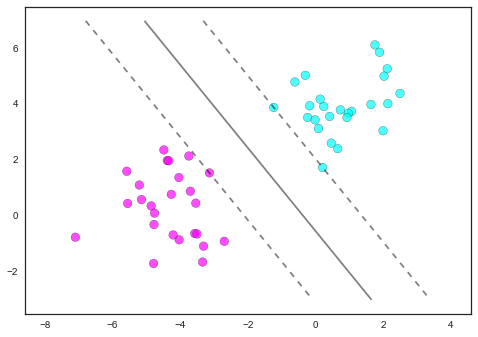

In [5]:
a = Variable(n)
b = Variable()

obj = Minimize(norm(a))
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/slab.pdf')

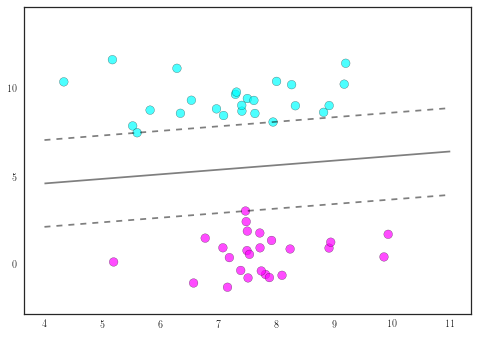

In [66]:
N = 50
n = 2

X, y = make_blobs(N, centers = 2, random_state=8)
y = 2*y - 1

a = Variable(n)
b = Variable()

obj = Minimize(norm(a))
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/max_margin.pdf')

# Non-separable Linear Classification

'infeasible'

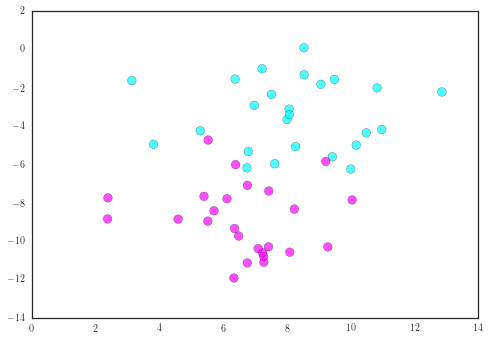

In [92]:
N = 50
n = 2

X, y = make_blobs(N, centers = 2, random_state=6, center_box=(-10,10), cluster_std=1.9)
y = 2*y - 1

a = Variable(n)
b = Variable()

obj = Minimize(0)
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()


myplot(X, y, a, b, margin=True, line_alpha=0, filename='fig/non_separable.pdf')
prob.status

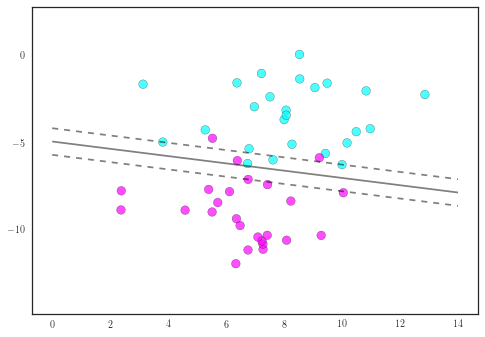

In [223]:
N = 50
n = 2

X, y = make_blobs(N, centers = 2, random_state=6, center_box=(-10,10), cluster_std=1.9)
y = 2*y - 1

a = Variable(n)
b = Variable()
u = Variable(N)

obj = Minimize(sum_entries(u))
constr = [mul_elemwise(y, X*a - b) >= 1 - u, u >= 0]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value
u = np.array(u.value).flatten()

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/sparse.pdf')

- make a minimal example
- plot as the thing expands/shrinks; get a piecewise linear function
- ok, so that explains it, but isn't this just some weird artifact of the model i chose?
- and i only chose the model because it matches up later with the width thing
- can i do something which penalizes misclassification more directly? or do i get a poorly specified problem, because
a,b can then be scaled arbitrarily
- get a better justification for my choice of the margin
- get a better name for the yax-b thing, 'margin'?

7.47475541919


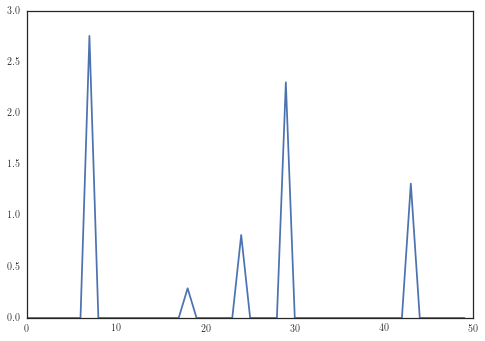

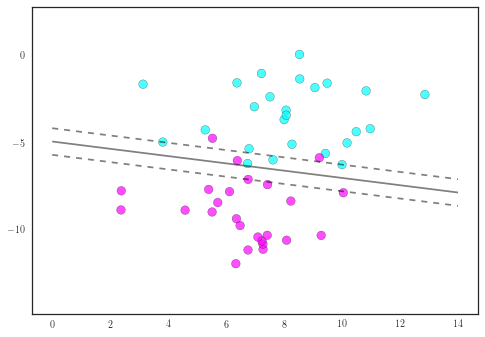

In [244]:
t = 1

a2 = t*a
b2 = t*b

u = np.maximum(0,1-y*(X.dot(a2)-b2))

print sum(u)
plt.plot(u)

fig1 = plt.figure()

myplot(X, y, a2, b2, margin=True, line_alpha=.5)

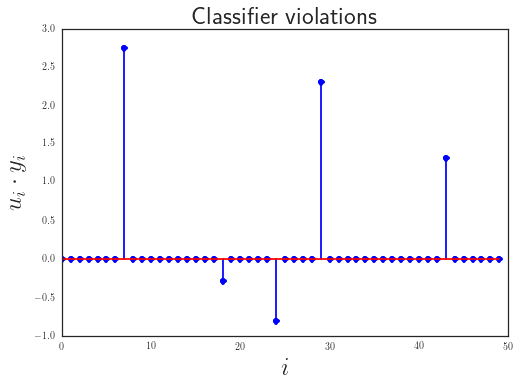

In [107]:
rc('text', usetex=True)
plt.stem(u*y)
plt.title(r"Classifier violations", fontsize=25)
plt.ylabel(r'$u_i \cdot y_i$', fontsize=25)
plt.xlabel(r'$i$', fontsize=25)
plt.savefig('fig/violations.pdf', bbox_inches='tight')

In [ ]:
rc('text', usetex=False)

In [76]:
def hinge(u):
    #return pos(1-u)
    return max_elemwise(0, 1-u)

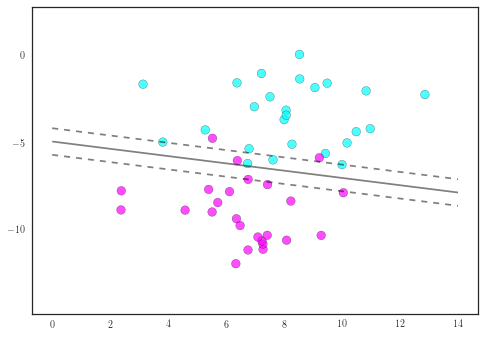

In [109]:
N = 50
n = 2

X, y = make_blobs(N, centers = 2, random_state=6, center_box=(-10,10), cluster_std=1.9)
y = 2*y - 1

a = Variable(n)
b = Variable()

r = mul_elemwise(y, X*a - b)
obj = Minimize(sum_entries(hinge(r)))
Problem(obj).solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=True, line_alpha=.5, filename=None)

# Support Vector Classifier

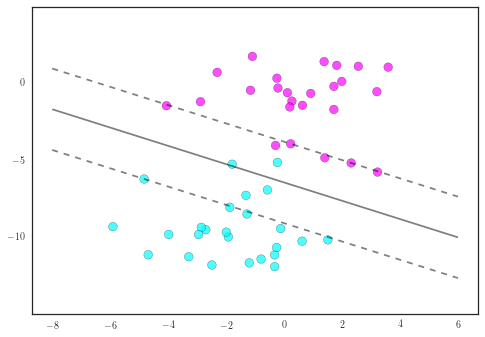

In [152]:
N = 50
n = 2

X, y = make_blobs(N, centers = 2, random_state=2, center_box=(-10,10), cluster_std=1.9)
y = 2*y - 1

a = Variable(n)
b = Variable()
u = Variable(N)
rho = .1

obj = Minimize(norm(a) + rho*sum_entries(u))
constr = [mul_elemwise(y, X*a - b) >= 1 - u, u >= 0]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value
u = np.array(u.value).flatten()

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/svc1.pdf')

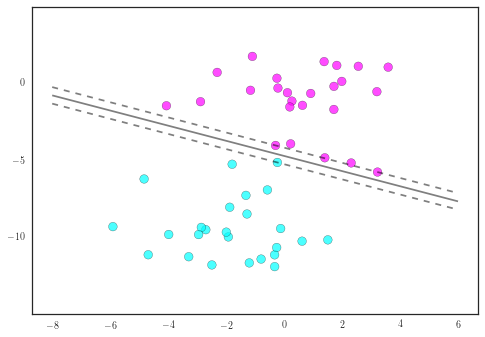

In [153]:
a = Variable(n)
b = Variable()
u = Variable(N)
rho = 10

obj = Minimize(norm(a) + rho*sum_entries(u))
constr = [mul_elemwise(y, X*a - b) >= 1 - u, u >= 0]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value
u = np.array(u.value).flatten()

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/svc2.pdf')

# Logistic Loss/Regression

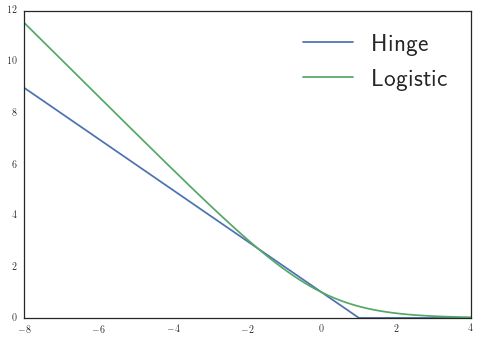

In [196]:
x = np.linspace(-8,4, 1000)
y_h = np.maximum(0,1-x)
y_log = np.log(1 + np.exp(-x))/np.log(2)
y_01 = (x <= 0) + 0
y_exp = np.exp(-x)

#plt.plot(x,y_01, label='0-1')
plt.plot(x,y_h, label='Hinge')
plt.plot(x,y_log, label='Logistic')
#plt.plot(x,y_exp, label='Exp')
#plt.axis([-8, 4, 0, 12])

plt.legend(fontsize=25)
plt.savefig('fig/log_hinge.pdf', bbox_inches='tight')

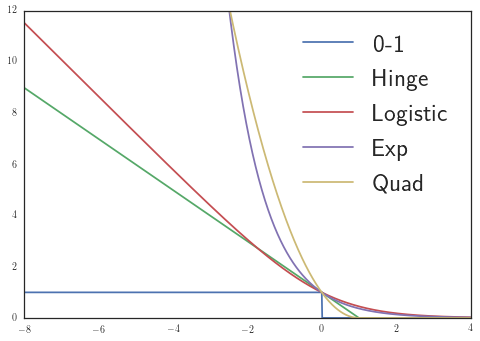

In [199]:
x = np.linspace(-8,4, 1000)
y_h = np.maximum(0,1-x)
y_log = np.log(1 + np.exp(-x))/np.log(2)
y_01 = (x <= 0) + 0
y_exp = np.exp(-x)
y_2 = np.square(np.maximum(0,1-x))

plt.plot(x,y_01, label='0-1')
plt.plot(x,y_h, label='Hinge')
plt.plot(x,y_log, label='Logistic')
plt.plot(x,y_exp, label='Exp')
plt.plot(x,y_2, label='Quad')
plt.axis([-8, 4, 0, 12])

plt.legend(fontsize=25)
plt.savefig('fig/losses.pdf', bbox_inches='tight')